# Análise Exploratória - Dados de Reclamações/Solicitações

Resolva os exercícios propostos abaixo.

## Leitura e análise inicial dos dados

Inicialize um DataFrame a partir do arquivo `../data/2017-02-01_156_-_Base_de_Dados_sample-limpo.csv` disponibilizado pelo professor.

Responda: Qual a média das idades das pessoas que registraram chamadas? Qual a idade máxima? Quantos valores únicos possuímos para a coluna `BAIRRO_ASS`?

**Dica:** A função len() pode ser usada para se obter o tamanho de listas, séries ou dataframes. Por exemplo, `len([1,3,9])` retorna 3.

In [96]:
# Resposta:
import pandas as pd

# lê o arquivo CSV
df = pd.read_csv('../data/2017-02-01_156_-_Base_de_Dados_sample-limpo.csv')

O primeiro passo ao se analisar dados desconhecidos é visualizar algumas linhas de dados:

In [97]:
# Resposta:

df.head(10)

,DATA,HORARIO,ASSUNTO,BAIRRO_ASS,SEXO,DATA_NASC,RESPOSTA_FINAL,HORA,IDADE,IDADE_zscore
0,2016-12-09,01:28:16,ABORDAGEM SOCIAL DE RUA - ADULTO,centro,M,1997-06-04,A pessoa da solicitação já faz parte da rede d...,1,19,-2.010845
1,2016-11-12,02:29:24,ABORDAGEM SOCIAL DE RUA - ADULTO,centro,M,1971-12-29,A pessoa da solicitação já faz parte da rede d...,2,45,-0.210111
2,2017-01-11,12:11:12,CRM-AF/SMS,sao francisco,F,1957-08-04,Alendronato de sódio 70 mg e Carbonato de cálc...,12,60,0.828775
3,2016-12-14,10:19:29,CRM-AF/SMS,sao francisco,F,1938-08-18,ALENDRONATO DE SÓDIO 70 MG E CARBONATO DE CÁL...,10,78,2.075437
4,2016-12-06,19:01:01,ABORDAGEM SOCIAL DE RUA - ADULTO,centro,M,1980-02-13,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P...",19,36,-0.833442
5,2016-12-09,21:52:22,ABORDAGEM SOCIAL DE RUA - ADULTO,reboucas,M,1978-06-20,Abordagem realizada. Pessoa foi encaminhada pa...,21,38,-0.694924
6,2016-12-06,23:46:39,ABORDAGEM SOCIAL DE RUA - ADULTO,jardim botanico,M,1982-02-02,A pessoa da solicitação já faz parte da rede d...,23,34,-0.971960
7,2016-12-21,15:06:16,TRÂNSITO,jardim botanico,M,1983-01-03,"Informamos que encaminhamos a viatura 524, che...",15,33,-1.041219
8,2017-01-10,22:58:02,ABORDAGEM SOCIAL DE RUA - ADULTO,jardim botanico,M,1986-03-29,01 - Abordagem realizada. Pessoa foi encaminha...,22,31,-1.179737
9,2017-01-21,07:14:40,ABORDAGEM SOCIAL DE RUA - ADULTO,jardim botanico,F,1983-03-29,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P...",7,34,-0.971960


## Visualização da distribuição das variáveis

Exiba histogramas para visualizar a distribuição de idades para homens e mulheres.

Responda: Existe alguma diferença na distribuição das idades entre homens e mulheres?

<Axes: >

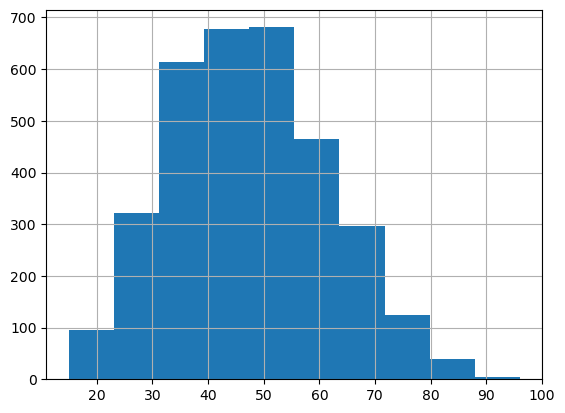

In [98]:
# Resposta:

df_m = df[df['SEXO'] == 'M']
df_m['IDADE'].hist()

<Axes: >

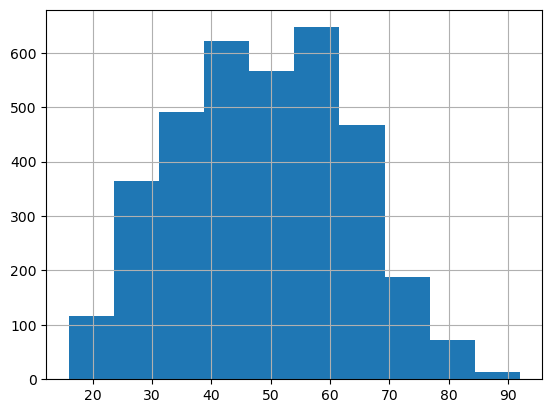

In [99]:
# Resposta:
df_f = df[df['SEXO'] == 'F']
df_f['IDADE'].hist()

**Resposta**: Sim, existe diferença na distribuição, porém a diferença não parece ser muito grande. A distribuição de idades dos homens se concentra mais em idades entre 40 e 60 anos, enquanto que no grupo feminino, além dessa faixa, os grupos entre 20 e 30 e 70 e 80 anos são mais frequentes que no grupo masculino.

Exiba um BoxPlot das idades de acordo com o sexo do registrante para ver se as diferenças ficam mais óbvias. 

**Dica:** Para exibir boxplots agrupados por categoria, use o método `boxplot` como no exemplo: `df.boxplot(column='IDADE', by = 'SEXO')`.

<Axes: title={'center': 'IDADE'}, xlabel='SEXO'>

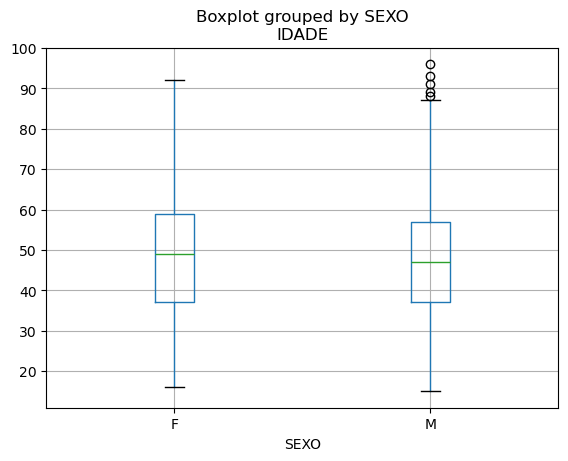

In [100]:
# Resposta:

df.boxplot(column='IDADE', by='SEXO')

## Seleção dos dados

Nesta etapa vamos filtrar apenas linhas com os tipos de registros (assuntos) mais comuns.

- Faça uma contagem dos assuntos mais comuns (usando `groupby`). Revise o procedimento no tutorial de Manipulação e Agregação de Dados, se necessário.
- Crie uma lista contendo os assuntos com mais de 60 registros. Armazene a lista em uma variável para uso posterior.

**Dica:** Para criar uma lista a partir de uma coluna de valores, use o comando `list()` como no exemplo: `list(df_grouped_top['ASSUNTO'])`

In [101]:
# Resposta:

df_assunto = df.groupby("ASSUNTO").size().sort_values(ascending=False).reset_index(name='FREQUENCIA')

df_assunto = df_assunto[df_assunto["FREQUENCIA"] > 60]
top_assuntos = list(df_assunto["ASSUNTO"])
top_assuntos

['COLETA',
 'ILUMINAÇÃO PÚBLICA',
 'TRÂNSITO',
 'ABORDAGEM SOCIAL DE RUA - ADULTO',
 'POSTO DE SAÚDE',
 'MOTORISTAS, COBRADORES E PORTEIROS',
 'DISQUE SOLIDARIEDADE',
 'POLUIÇÃO',
 'OUTROS SETORES SMS',
 'FISCALIZAÇÃO DE TERRENOS BALDIOS OU EDIFICADOS',
 'ANIMAIS',
 'ANIMAIS DOMÉSTICOS',
 'SEMÁFORO',
 'ÁRVORE',
 'FAUNA SINANTRÓPICA',
 'DRENAGEM',
 'UNIDADE DE PRONTO ATENDIMENTO',
 'LIMPEZA']

Crie um novo DataFrame contendo apenas registros contidos na lista das registros mais comuns.

**Dica:** Para filtrar linhas que contêm valores de uma lista, use o método `isin()`. Por exemplo, `df['ASSUNTO'].isin(lista_top)` retorna uma lista de valores True/False que pode ser usada para selecionar as linhas de interesse.

In [102]:
# Resposta:

df_top_assuntos = df[df['ASSUNTO'].isin(top_assuntos)]

df_top_assuntos

,DATA,HORARIO,ASSUNTO,BAIRRO_ASS,SEXO,DATA_NASC,RESPOSTA_FINAL,HORA,IDADE,IDADE_zscore
0,2016-12-09,01:28:16,ABORDAGEM SOCIAL DE RUA - ADULTO,centro,M,1997-06-04,A pessoa da solicitação já faz parte da rede d...,1,19,-2.010845
1,2016-11-12,02:29:24,ABORDAGEM SOCIAL DE RUA - ADULTO,centro,M,1971-12-29,A pessoa da solicitação já faz parte da rede d...,2,45,-0.210111
4,2016-12-06,19:01:01,ABORDAGEM SOCIAL DE RUA - ADULTO,centro,M,1980-02-13,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P...",19,36,-0.833442
5,2016-12-09,21:52:22,ABORDAGEM SOCIAL DE RUA - ADULTO,reboucas,M,1978-06-20,Abordagem realizada. Pessoa foi encaminhada pa...,21,38,-0.694924
6,2016-12-06,23:46:39,ABORDAGEM SOCIAL DE RUA - ADULTO,jardim botanico,M,1982-02-02,A pessoa da solicitação já faz parte da rede d...,23,34,-0.971960
...,...,...,...,...,...,...,...,...,...,...
6858,2017-01-27,19:24:18,ABORDAGEM SOCIAL DE RUA - ADULTO,jardim botanico,M,1988-05-11,"EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P...",19,29,-1.318255
6859,2016-11-04,03:26:52,ABORDAGEM SOCIAL DE RUA - ADULTO,jardim botanico,M,1983-01-19,01 - Abordagem realizada sendo o homem encamin...,3,33,-1.041219
6861,2016-11-28,13:04:25,DRENAGEM,cidade industrial,M,1968-04-14,SEM POSSIBILIDADE DE ATENDIMENTO FACE SUSPENSÃ...,13,48,-0.002333
6862,2016-12-22,10:11:15,TRÂNSITO,juveve,M,1989-05-18,"Informamos que encaminhamos a viatura 430, às ...",10,27,-1.456773


## Análise de similaridades entre registros de bairros

Queremos agora identificar bairros com problemas similares. Use o método `crosstab()` para gerar um novo DataFrame com os bairros nas colunas e os assuntos (os mais comuns, filtrados acima) nas linhas. 

In [103]:
# Resposta:

df_bairros = pd.crosstab(df_top_assuntos['ASSUNTO'], df['BAIRRO_ASS'])

df_bairros

BAIRRO_ASS,abranches,agua verde,ahu,alto boqueirao,alto da gloria,alto da rua xv,atuba,augusta,bacacheri,bairro alto,...,sitio cercado,taboao,taruma,tatuquara,tingui,uberaba,umbara,vila izabel,vista alegre,xaxim
ASSUNTO,,,,,,,,,,,,,,,,,,,,,
ABORDAGEM SOCIAL DE RUA - ADULTO,2,8,4,3,5,6,2,0,7,2,...,4,0,0,1,1,0,0,0,1,0
ANIMAIS,0,0,1,7,1,0,0,2,1,2,...,7,0,0,5,1,8,3,1,3,2
ANIMAIS DOMÉSTICOS,1,1,0,4,0,0,0,0,3,5,...,7,0,0,4,0,10,1,0,0,7
COLETA,15,41,17,31,4,13,7,4,34,86,...,60,1,28,19,13,47,5,7,26,47
DISQUE SOLIDARIEDADE,1,4,2,5,0,4,1,0,2,4,...,9,1,0,2,2,3,2,1,4,6
DRENAGEM,0,1,0,5,0,0,2,0,2,0,...,5,0,1,2,2,5,2,1,1,3
FAUNA SINANTRÓPICA,1,2,0,2,2,1,0,0,2,1,...,6,0,0,1,1,3,1,0,1,4
FISCALIZAÇÃO DE TERRENOS BALDIOS OU EDIFICADOS,1,13,1,2,0,2,1,1,0,0,...,7,0,0,3,0,9,2,0,2,4
ILUMINAÇÃO PÚBLICA,12,22,9,29,5,11,12,2,21,26,...,45,3,14,22,4,38,7,4,8,36


Usando o DataFrame obtido anteriormente, gere a matriz de correlações entre bairros (método `corr()`).

In [104]:
# Resposta:
df_corr = df_bairros.corr()

df_corr

BAIRRO_ASS,abranches,agua verde,ahu,alto boqueirao,alto da gloria,alto da rua xv,atuba,augusta,bacacheri,bairro alto,...,sitio cercado,taboao,taruma,tatuquara,tingui,uberaba,umbara,vila izabel,vista alegre,xaxim
BAIRRO_ASS,,,,,,,,,,,,,,,,,,,,,
abranches,1.000000,0.643055,0.884902,0.970722,0.123024,0.791709,0.794544,0.777465,0.874166,0.903948,...,0.963485,0.465605,0.907070,0.883269,0.844186,0.954435,0.678211,0.624121,0.854907,0.975221
agua verde,0.643055,1.000000,0.858102,0.623982,0.741225,0.872836,0.791846,0.457873,0.797828,0.637879,...,0.587818,0.204879,0.812256,0.517301,0.634941,0.653743,0.781724,0.907642,0.687336,0.670143
ahu,0.884902,0.858102,1.000000,0.848473,0.389906,0.914807,0.807990,0.714865,0.935760,0.886528,...,0.852842,0.358148,0.955636,0.693846,0.852803,0.870747,0.737892,0.818051,0.917330,0.860442
alto boqueirao,0.970722,0.623982,0.848473,1.000000,0.156873,0.759529,0.817464,0.774408,0.831386,0.854039,...,0.934172,0.446280,0.876565,0.902115,0.832988,0.952150,0.756346,0.648789,0.819032,0.972161
alto da gloria,0.123024,0.741225,0.389906,0.156873,1.000000,0.489287,0.515642,-0.098966,0.419315,0.067272,...,0.074968,-0.087167,0.303575,0.126778,0.150834,0.118885,0.521474,0.684358,0.111794,0.177159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
uberaba,0.954435,0.653743,0.870747,0.952150,0.118885,0.750817,0.788739,0.832935,0.851041,0.888634,...,0.960357,0.433171,0.906221,0.890315,0.787015,1.000000,0.764711,0.654870,0.871909,0.942704
umbara,0.678211,0.781724,0.737892,0.756346,0.521474,0.736560,0.889417,0.585468,0.702908,0.542919,...,0.662525,0.440778,0.728206,0.703325,0.529311,0.764711,1.000000,0.829250,0.620305,0.720214
vila izabel,0.624121,0.907642,0.818051,0.648789,0.684358,0.774724,0.776734,0.439727,0.786965,0.633023,...,0.592859,0.257679,0.780455,0.545508,0.643710,0.654870,0.829250,1.000000,0.681306,0.690296


Use um Heatmap para exibir as correlações com cores.

In [105]:
# Resposta:

df_corr = df_corr.style.background_gradient(cmap='RdBu')
df_corr

BAIRRO_ASS,abranches,agua verde,ahu,alto boqueirao,alto da gloria,alto da rua xv,atuba,augusta,bacacheri,bairro alto,barreirinha,batel,bigorrilho,boa vista,bom retiro,boqueirao,butiatuvinha,cabral,cachoeira,cajuru,campina do siqueira,campo comprido,campo de santana,capao da imbuia,capao raso,cascatinha,caximba,centro,centro civico,cidade industrial,cristo rei,fanny,fazendinha,ganchinho,guabirotuba,guaira,hauer,hugo lange,jardim botanico,jardim das americas,jardim social,juveve,lamenha pequena,lindoia,merces,mossungue,novo mundo,orleans,parolin,pilarzinho,pinheirinho,portao,prado velho,reboucas,riviera,santa candida,santa felicidade,santa quiteria,santo inacio,sao braz,sao francisco,sao joao,sao lourenco,sao miguel,seminario,sitio cercado,taboao,taruma,tatuquara,tingui,uberaba,umbara,vila izabel,vista alegre,xaxim
BAIRRO_ASS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
abranches,1.000000,0.643055,0.884902,0.970722,0.123024,0.791709,0.794544,0.777465,0.874166,0.903948,0.915815,0.142382,0.429061,0.910496,0.728421,0.902368,0.828907,0.376865,0.954405,0.976731,0.504533,0.586123,0.719228,0.955744,0.890091,0.885406,0.314143,0.137770,0.040548,0.968973,0.426515,0.800911,0.657831,0.584575,0.911054,0.856729,0.757981,0.852321,0.309828,0.856248,0.921534,0.422406,0.563526,0.786549,0.703202,0.908748,0.854421,0.939228,0.875792,0.975035,0.926880,0.737056,0.147431,0.423733,0.740447,0.968889,0.945630,0.928100,0.937139,0.919956,0.348210,0.930083,0.820047,0.348648,0.518521,0.963485,0.465605,0.907070,0.883269,0.844186,0.954435,0.678211,0.624121,0.854907,0.975221
agua verde,0.643055,1.000000,0.858102,0.623982,0.741225,0.872836,0.791846,0.457873,0.797828,0.637879,0.512614,0.784086,0.891026,0.697960,0.871694,0.687015,0.569184,0.825814,0.527836,0.545761,0.706063,0.839517,0.258162,0.631410,0.767300,0.593581,-0.023514,0.609453,0.699540,0.636181,0.881743,0.707867,0.359369,0.231161,0.641049,0.518689,0.683979,0.916435,0.341548,0.910639,0.690065,0.884572,0.222671,0.493078,0.951687,0.828035,0.746401,0.758001,0.718012,0.643797,0.644992,0.947406,0.753371,0.628627,0.558149,0.639815,0.592441,0.741585,0.586927,0.688921,0.754905,0.575095,0.742522,0.105815,0.974131,0.587818,0.204879,0.812256,0.517301,0.634941,0.653743,0.781724,0.907642,0.687336,0.670143
ahu,0.884902,0.858102,1.000000,0.848473,0.389906,0.914807,0.807990,0.714865,0.935760,0.886528,0.792047,0.420994,0.686083,0.945146,0.922838,0.922535,0.811249,0.635861,0.823394,0.833334,0.615472,0.742190,0.457441,0.856304,0.908112,0.885962,0.113592,0.392261,0.314338,0.841986,0.726087,0.877767,0.594353,0.407004,0.915763,0.768466,0.878586,0.974209,0.438139,0.950246,0.931516,0.726374,0.357304,0.765001,0.902160,0.957424,0.911117,0.905228,0.925833,0.908692,0.881106,0.928919,0.401024,0.536333,0.800853,0.899916,0.877200,0.924572,0.888238,0.921434,0.499563,0.849812,0.818716,0.197566,0.763279,0.852842,0.358148,0.955636,0.693846,0.852803,0.870747,0.737892,0.818051,0.917330,0.860442
alto boqueirao,0.970722,0.623982,0.848473,1.000000,0.156873,0.759529,0.817464,0.774408,0.831386,0.854039,0.897237,0.177024,0.431543,0.859270,0.681477,0.859317,0.809132,0.379594,0.919115,0.938669,0.485636,0.593394,0.752362,0.926682,0.865718,0.831313,0.393580,0.112547,0.090377,0.973482,0.408541,0.732108,0.609013,0.636563,0.880038,0.797506,0.656921,0.815843,0.225557,0.847125,0.866363,0.408974,0.612504,0.711928,0.689677,0.893410,0.808414,0.940999,0.805686,0.943970,0.888247,0.689343,0.190035,0.397686,0.668186,0.934110,0.913642,0.892917,0.895670,0.868612,0.371846,0.886034,0.808659,0.344973,0.518889,0.934172,0.446280,0.876565,0.902115,0.832988,0.952150,0.756346,0.648789,0.819032,0.972161
alto da gloria,0.123024,0.741225,0.389906,0.156873,1.000000,0.489287,0.515642,-0.098966,0.419315,0.067272,-0.014281,0.979516,0.825419,0.103684,0.487061,0.102249,0.056928,0.773983,-0.014078,0.003453,0.744008,0.632493,-0.035814,0.098480,0.371206,-0.008607,-0.097972,0.777002,0.973261,0.144089,0.774049,0.145261,0.117440,-0.028747,0.062854,-0.004882,0

É possível perceber algum padrão entre os bairros baseando-se nas correlações obtidas?

Não, apenas observando as correlações e o heatmap, não é possível observar um padrão entre os bairros.

## Análise de bairros mais problemáticos

Agora nosso interesse é determinar os bairros com mais registros.

- Crie um DataFrame com a contagem de registros por bairro (usando a coluna BAIRRO_ASS).
- Exiba os dados usando um gráfico de barras para visualizarmos os bairros com mais registros

In [106]:
# Resposta:

df_count_bairro = df.groupby(["BAIRRO_ASS"]).size().reset_index(name="count")
df_count_bairro

,BAIRRO_ASS,count
0,abranches,52
1,agua verde,201
2,ahu,50
3,alto boqueirao,153
4,alto da gloria,87
...,...,...
70,uberaba,194
71,umbara,47
72,vila izabel,33
73,vista alegre,60


<Axes: xlabel='BAIRRO_ASS'>

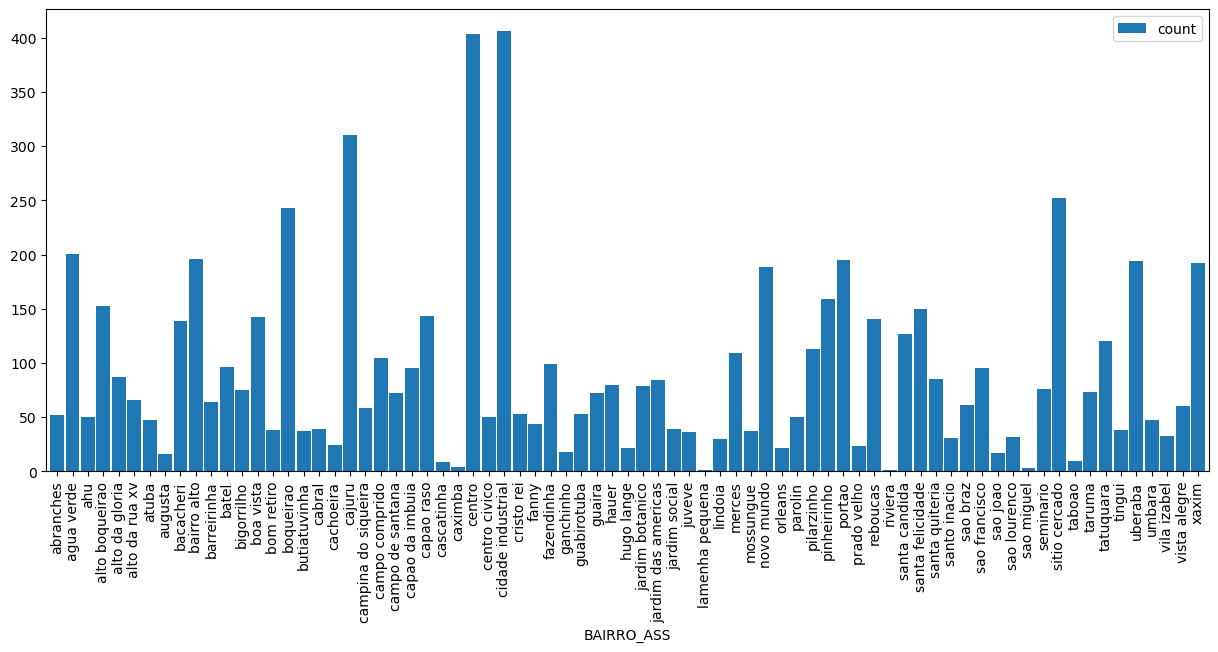

In [107]:
df_count_bairro.plot.bar(x='BAIRRO_ASS', y='count', width=0.9, figsize=(15, 6))

O problema de considerar apenas o total de registros é que não estamos considerando a população dos bairros. Então o ideal é calcular a *taxa* de registros, ou seja, o número de registros por habitante do bairro.

- Crie um novo DataFrame a partir dos dados do arquivo `../data/dados_bairros.csv`.
- Converta os nomes dos bairros deste DataFrame para caixa-baixo (minúsculo).
- Faça uma junção do DataFrame de totais por bairro com o novo DataFrame.

**Dica:** Para especificar as colunas contendo os valores base para a junção, especifique os parâmetros `left_on` e `right_on` no método `merge`.

In [108]:
# Resposta:
df_data_bairros = pd.read_csv('../data/dados_bairros.csv')
df_data_bairros["Bairro"] = df_data_bairros['Bairro'].str.lower()

df_joined = pd.merge(df_count_bairro, df_data_bairros, left_on="BAIRRO_ASS", right_on="Bairro")
df_joined

,BAIRRO_ASS,count,Bairro,AreaKm2,Homens,Mulheres,Total,Domicilios,RendimentoDom
0,abranches,52,abranches,"4,32",5463,5702,11165,3154,"1009,67"
1,agua verde,201,agua verde,"4,76",22546,27320,49866,17045,"3332,57"
2,ahu,50,ahu,"1,84",5117,6031,11148,3608,"2827,81"
3,alto da gloria,87,alto da gloria,"0,88",2513,3075,5588,2125,"3263,47"
4,atuba,47,atuba,"4,27",6156,6476,12632,3627,"1211,6"
...,...,...,...,...,...,...,...,...,...
67,uberaba,194,uberaba,"14,09",29418,30920,60338,15482,"952,14"
68,umbara,47,umbara,"22,47",7280,7315,14595,17064,"908,7"
69,vila izabel,33,vila izabel,"1,21",4993,5956,10949,751,"2438,13"
70,vista alegre,60,vista alegre,"3,69",4735,5195,9930,2855,"2079,83"


Crie uma nova coluna chamada *taxa* contendo o resultado da divisão da coluna de contagem de registros pela coluna de total de habitantes.

In [110]:
# Resposta:

df_joined["TAXA"] = df_joined["Total"] / df_joined["count"]
df_joined

,BAIRRO_ASS,count,Bairro,AreaKm2,Homens,Mulheres,Total,Domicilios,RendimentoDom,TAXA
0,abranches,52,abranches,"4,32",5463,5702,11165,3154,"1009,67",214.711538
1,agua verde,201,agua verde,"4,76",22546,27320,49866,17045,"3332,57",248.089552
2,ahu,50,ahu,"1,84",5117,6031,11148,3608,"2827,81",222.960000
3,alto da gloria,87,alto da gloria,"0,88",2513,3075,5588,2125,"3263,47",64.229885
4,atuba,47,atuba,"4,27",6156,6476,12632,3627,"1211,6",268.765957
...,...,...,...,...,...,...,...,...,...,...
67,uberaba,194,uberaba,"14,09",29418,30920,60338,15482,"952,14",311.020619
68,umbara,47,umbara,"22,47",7280,7315,14595,17064,"908,7",310.531915
69,vila izabel,33,vila izabel,"1,21",4993,5956,10949,751,"2438,13",331.787879
70,vista alegre,60,vista alegre,"3,69",4735,5195,9930,2855,"2079,83",165.500000


Exiba um gráfico de barras mostrando os bairros de acordo com a taxa de registros.

<Axes: xlabel='BAIRRO_ASS'>

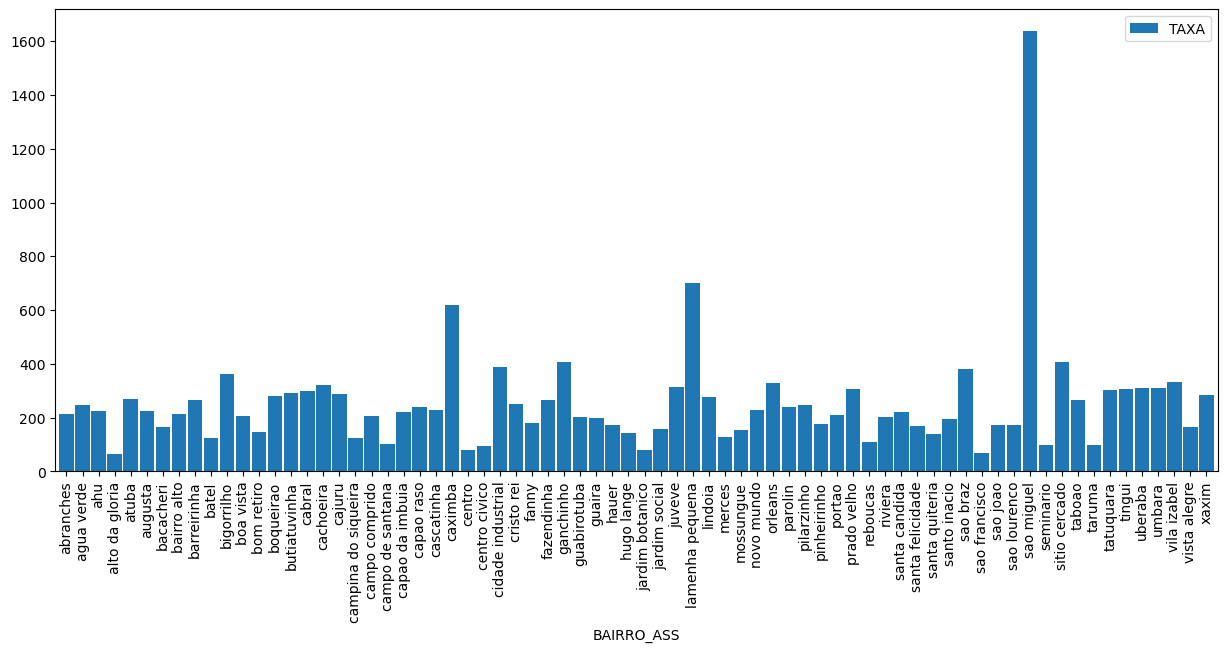

In [111]:
# Resposta:

df_joined.plot.bar(x='BAIRRO_ASS', y='TAXA', width=0.9, figsize=(15, 6))

## Analisando tendências temporais

Vamos agora identificar os meses com mais registros. 

- Usando o DataFrame completo (lido a partir do CSV), converta a coluna *DATA* para o tipo `datetime`. Revise o tutorial de Limpeza de Dados se necessário.
- Agrupe as linhas contando os registros por mês. Revise o tutorial de Análise Exploratória se necessário.
- Exiba um gráfico de linha com a evolução da contagem.


In [120]:
# Resposta:

df['DATA'] = pd.to_datetime(df['DATA'], format="%Y-%m-%d")
df["MES"] = df["DATA"].dt.month

df_group_mes = df.groupby("MES").size()
df_group_mes

MES
1     1786
11    2945
12    2135
dtype: int64

<Axes: xlabel='MES'>

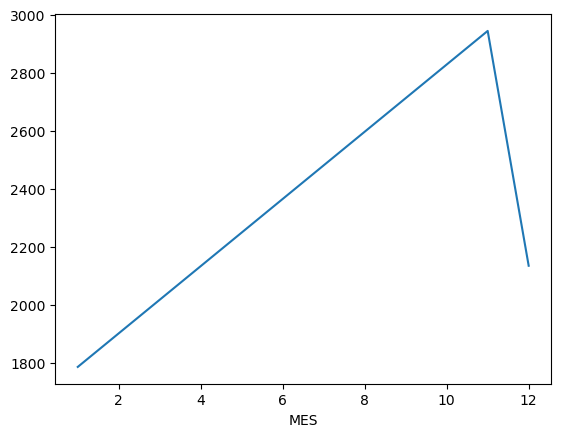

In [121]:
# Resposta:

df_group_mes.plot()